In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
sns.set()

In [105]:
df = pd.read_csv('iris-data.csv')
df.head()

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [106]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   sepal_length_cm  150 non-null    float64
 1   sepal_width_cm   150 non-null    float64
 2   petal_length_cm  150 non-null    float64
 3   petal_width_cm   145 non-null    float64
 4   class            150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [107]:
df['class'].value_counts()

Iris-virginica     50
Iris-setosa        49
Iris-versicolor    45
versicolor          5
Iris-setossa        1
Name: class, dtype: int64

In [108]:
df['class'] = df['class'].replace(['versicolor','Iris-setossa'],['Iris-versicolor','Iris-setosa'])
df['class'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: class, dtype: int64

/Users/ivan.repilado/miniconda3/envs/ironhack/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


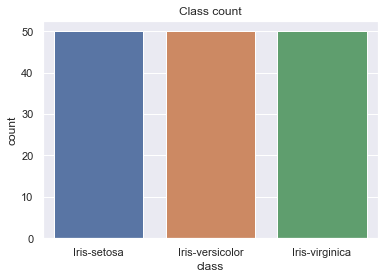

In [109]:
plt.title('Class count')
sns.countplot(df['class']);

In [110]:
#Pasamos a ver en qué sitio están los 5 nulos:
null_values = df[df["petal_width_cm"].isnull()]
null_values

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class
7,5.0,3.4,1.5,NaN,Iris-setosa
8,4.4,2.9,1.4,NaN,Iris-setosa
9,4.9,3.1,1.5,NaN,Iris-setosa
10,5.4,3.7,1.5,NaN,Iris-setosa
11,4.8,3.4,1.6,NaN,Iris-setosa


In [111]:
#Como todos pertenecen a la misma clase, y para que el dataframe quede balanceado, vamos a sustituir los NaN por la media del valor para esta clase:
mean_iris_setosa = df[df["class"]=="Iris-setosa"]["petal_width_cm"].mean()
df['petal_width_cm'] = df['petal_width_cm'].fillna(mean_iris_setosa)

In [112]:
df.describe()

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm
count,150.000000,150.000000,150.000000,150.000000
mean,5.644627,3.054667,3.758667,1.203704
std,1.312781,0.433123,1.764420,0.763205
min,0.055000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.700000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


Tal y como vemos en las clases, los nombres no estan bien entrados, por lo que pasamos a corregirlos para estandarizalos.
Decidimos quedarnos con las clases: Iris-virginica, Iris-setosa e Iris-versicolor.

/Users/ivan.repilado/miniconda3/envs/ironhack/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


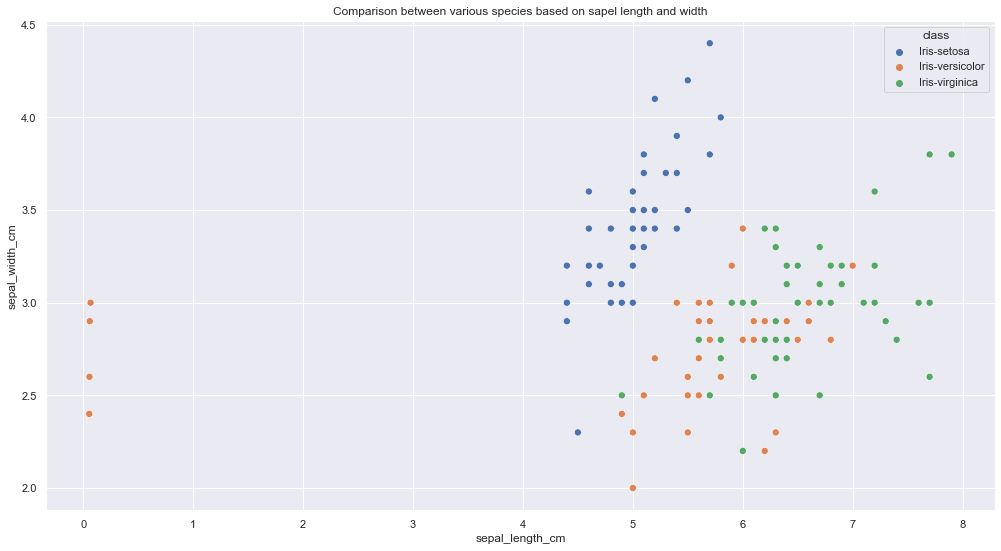

In [113]:
#Comparison between various species based on sepal length and width
plt.figure(figsize=(17,9))
plt.title('Comparison between various species based on sapel length and width')
sns.scatterplot(df['sepal_length_cm'],df['sepal_width_cm'],hue =df['class'],s=50);

Tal y como vemos, tenemos 4 valores de la clase Iris-Versicolor con una longitud de prácticamente 0 cm. Veremos si los consideramos como outliers, pero son valores muy poco comunes

/Users/ivan.repilado/miniconda3/envs/ironhack/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


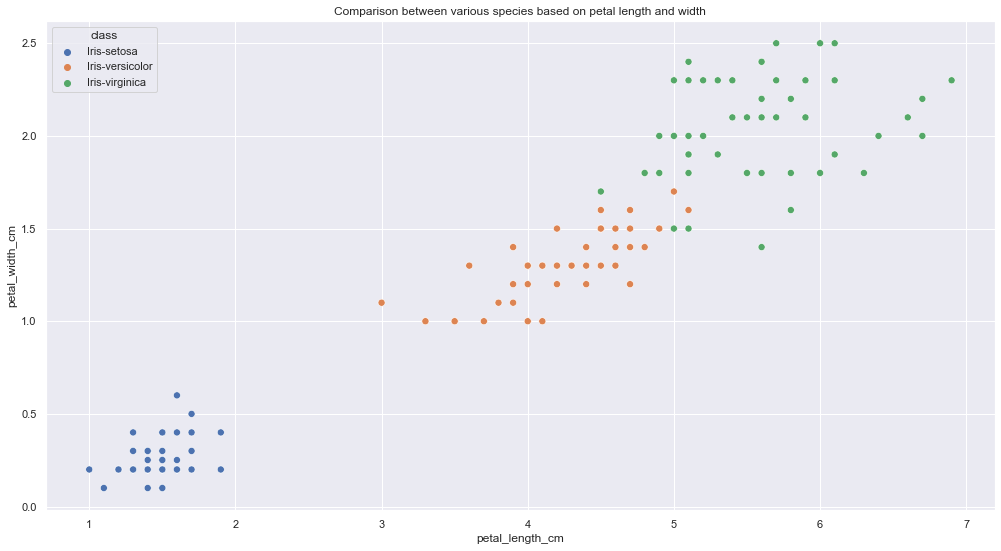

In [115]:
#Comparison between various species based on petal length and width
plt.figure(figsize=(17,9))
plt.title('Comparison between various species based on petal length and width')
sns.scatterplot(df['petal_length_cm'],df['petal_width_cm'],hue =df['class'],s=50);

Vemos claramenete separadas cada una de las clases, por lo que podemos ver como las dimensions del pétalo dependen directamente de la clase de Iris.

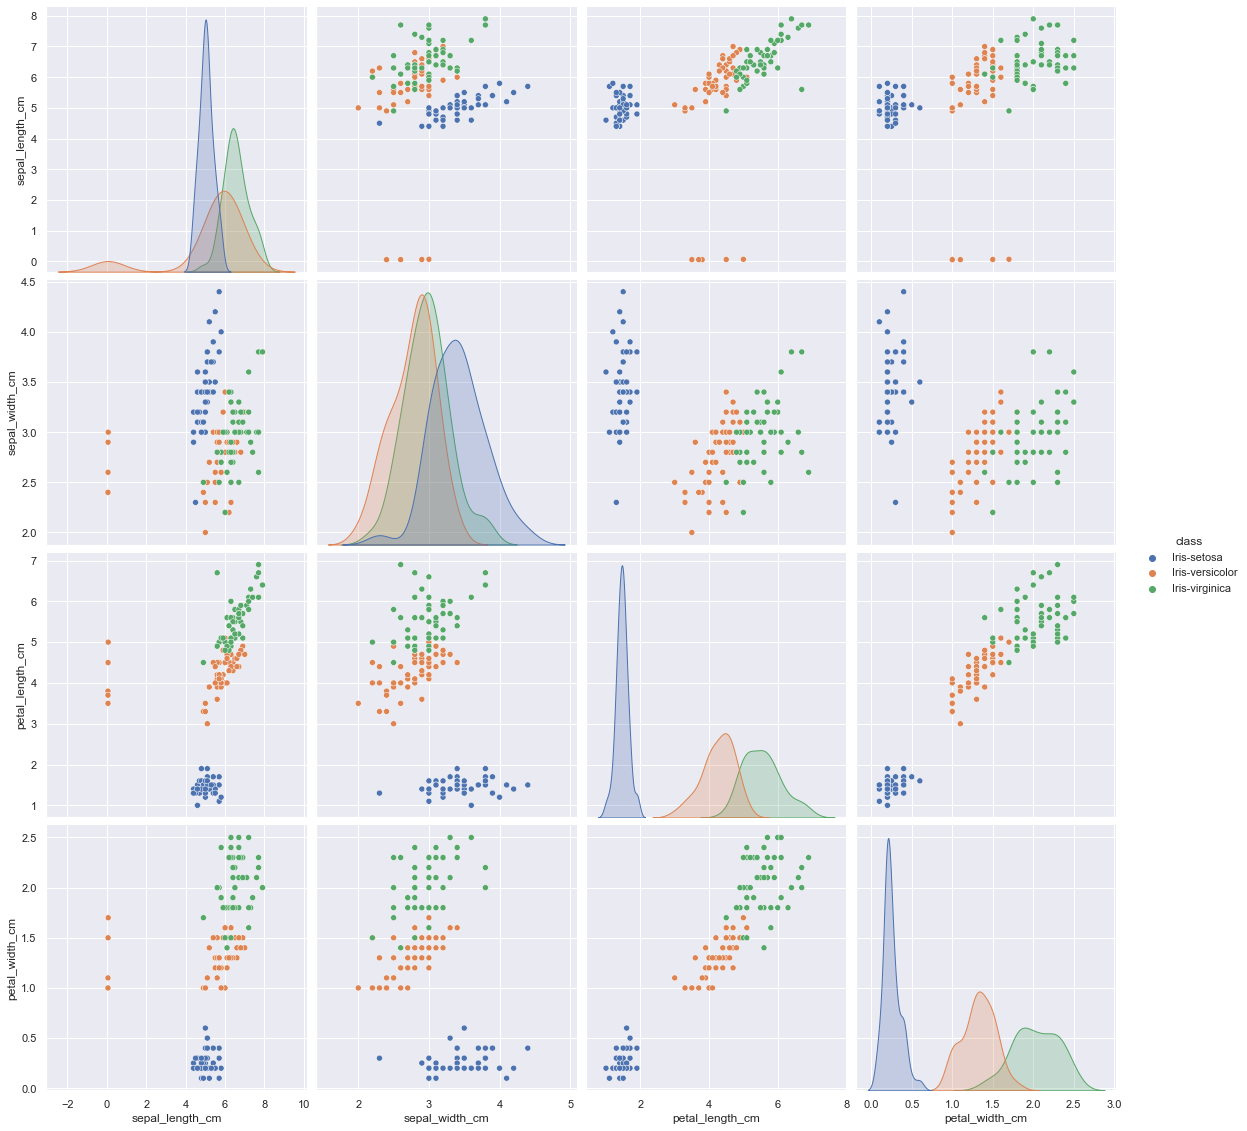

In [116]:
sns.pairplot(df,hue='class',height=4);


[]

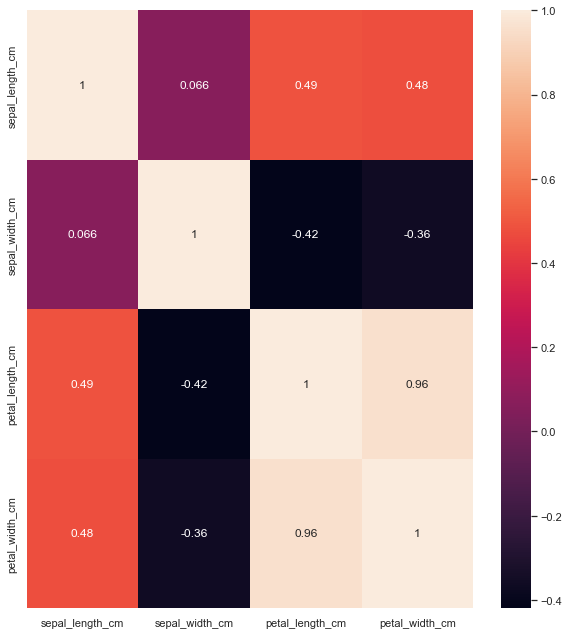

In [117]:
#Let's check the correlation:

plt.figure(figsize=(10,11))
sns.heatmap(df.corr(),annot=True)
plt.plot()

In [118]:
df.groupby('class').agg(['mean', 'median'])


sepal_length_cm        sepal_width_cm        petal_length_cm  \
                           mean median           mean median            mean   
class                                                                          
Iris-setosa             5.03400   5.00          3.418    3.4           1.464   
Iris-versicolor         5.35388   5.80          2.772    2.8           4.260   
Iris-virginica          6.54600   6.45          2.974    3.0           5.552   

                       petal_width_cm         
                median           mean median  
class                                         
Iris-setosa       1.50       0.251111    0.2  
Iris-versicolor   4.35       1.326000    1.3  
Iris-virginica    5.55       2.034000    2.0

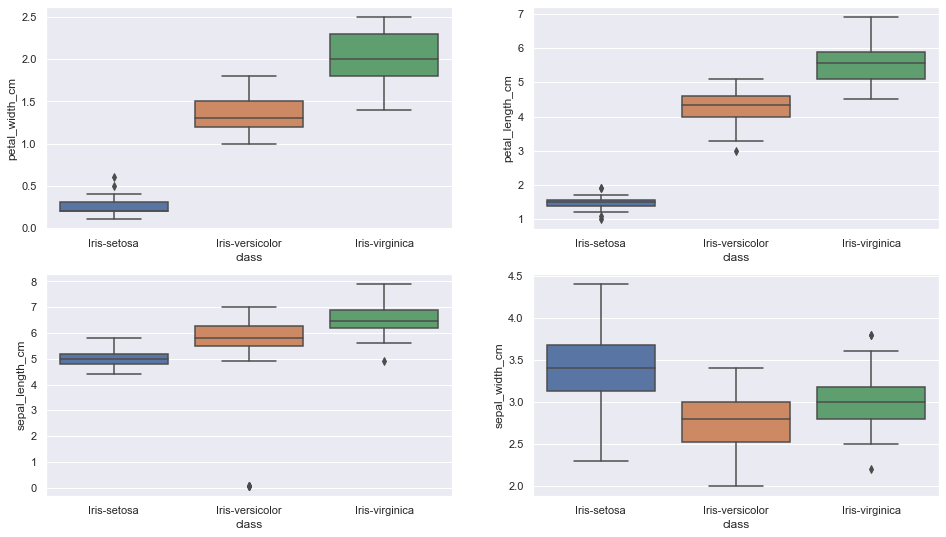

In [119]:
fig, axes = plt.subplots(2, 2, figsize=(16,9))
sns.boxplot( y='petal_width_cm', x= 'class', data=df, ax=axes[0, 0])
sns.boxplot( y='petal_length_cm', x= 'class', data=df, ax=axes[0, 1])
sns.boxplot( y='sepal_length_cm', x= 'class', data=df, ax=axes[1, 0])
sns.boxplot( y='sepal_width_cm', x= 'class', data=df, ax=axes[1, 1])
plt.show()

In [121]:
#Hemos visto que tenemos varios otuliers, por lo que decidimos eliminarlos para obtener un dataset mas preciso:
cols = ['sepal_length_cm', 'sepal_width_cm','petal_length_cm','petal_width_cm']

Q1 = df[cols].quantile(0.25)
Q3 = df[cols].quantile(0.75)
IQR = Q3 - Q1

df_cleaned = df[~((df[cols] < (Q1 - 1.5 * IQR)) |(df[cols] > (Q3 + 1.5 * IQR))).any(axis=1)]
df_cleaned

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,2.3,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [122]:
df_cleaned.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 141 entries, 0 to 149
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   sepal_length_cm  141 non-null    float64
 1   sepal_width_cm   141 non-null    float64
 2   petal_length_cm  141 non-null    float64
 3   petal_width_cm   141 non-null    float64
 4   class            141 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.6+ KB


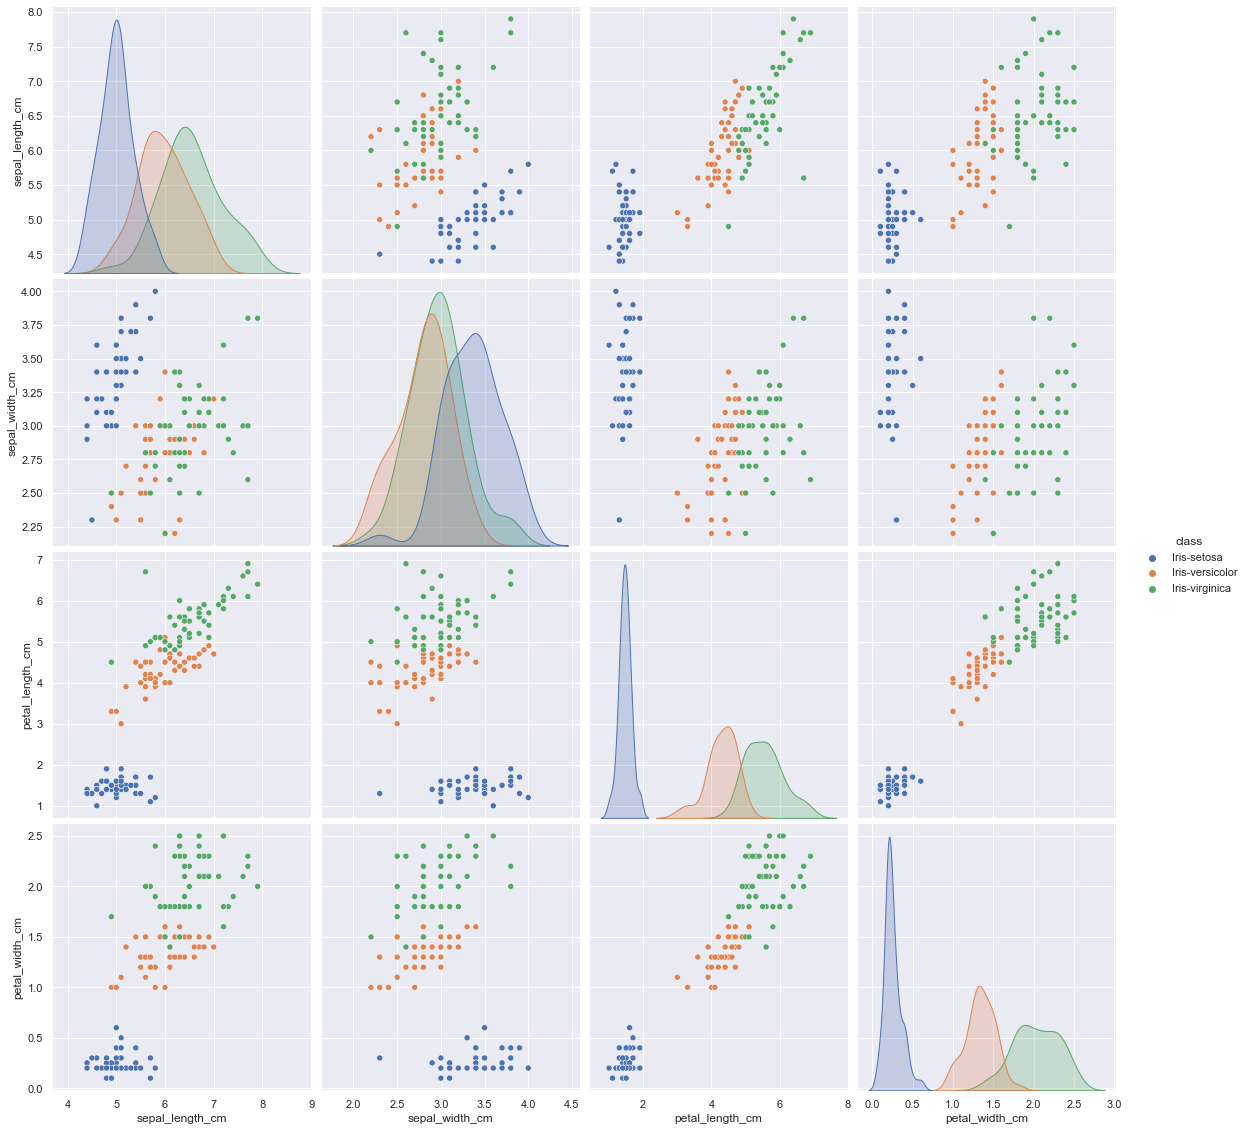

In [123]:
#Ploteamos las características principales, para ver si después de la limpieza todo estás mas preciso:
sns.pairplot(df_cleaned,hue='class',height=4);


Como vemos, las distribuciones tienden a ser mas normales, además de haber eliminado algunos valores que aparentemente podían dar problemas para futuros estudios.
Pasamos ahora a categorizar la columna clase, y podemos dar por finalizada la limpieza y preparación de los datos.

In [127]:
iris_data_cleaned = pd.get_dummies(df_cleaned, 
                                          columns=['class'], 
                                          drop_first=True)
iris_data_cleaned

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class_Iris-versicolor,class_Iris-virginica
0,5.1,3.5,1.4,0.2,0,0
1,4.9,3.0,1.4,0.2,0,0
2,4.7,3.2,1.3,0.2,0,0
3,4.6,3.1,1.5,0.2,0,0
4,5.0,3.6,1.4,0.2,0,0
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,0,1
146,6.3,2.5,5.0,2.3,0,1
147,6.5,3.0,5.2,2.0,0,1
148,6.2,3.4,5.4,2.3,0,1


Nuestro datase está listo para ser estudiado. A modo de resumen, hemos llevado a cabo las siguientes tareas:
- Analisis exploratorio y visual
- Unificación de las clases
- Sustitución de valores nulos por la media de la clase
- Comprobacion de correlacion
- Exploración de outliers
- Eliminación de outliers
- Categorización de las clases

In [133]:
iris_data_cleaned.to_csv('iris-data-cleaned.csv')